# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reading Data

In [3]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

# Seaborn Activity

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

### Graph using Countplot

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

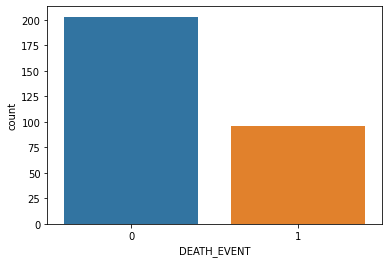

In [9]:
sns.countplot(x='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

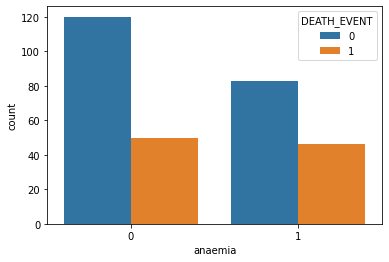

In [11]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='anaemia')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

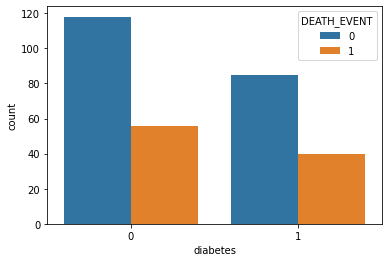

In [12]:
sns.countplot(hue = 'DEATH_EVENT', data=df, x='diabetes')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

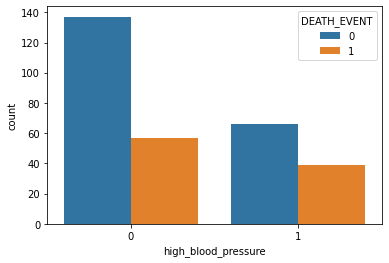

In [13]:
sns.countplot(hue='DEATH_EVENT',data=df,x='high_blood_pressure')

### All Pairs in a Graph

<Figure size 1440x1440 with 0 Axes>

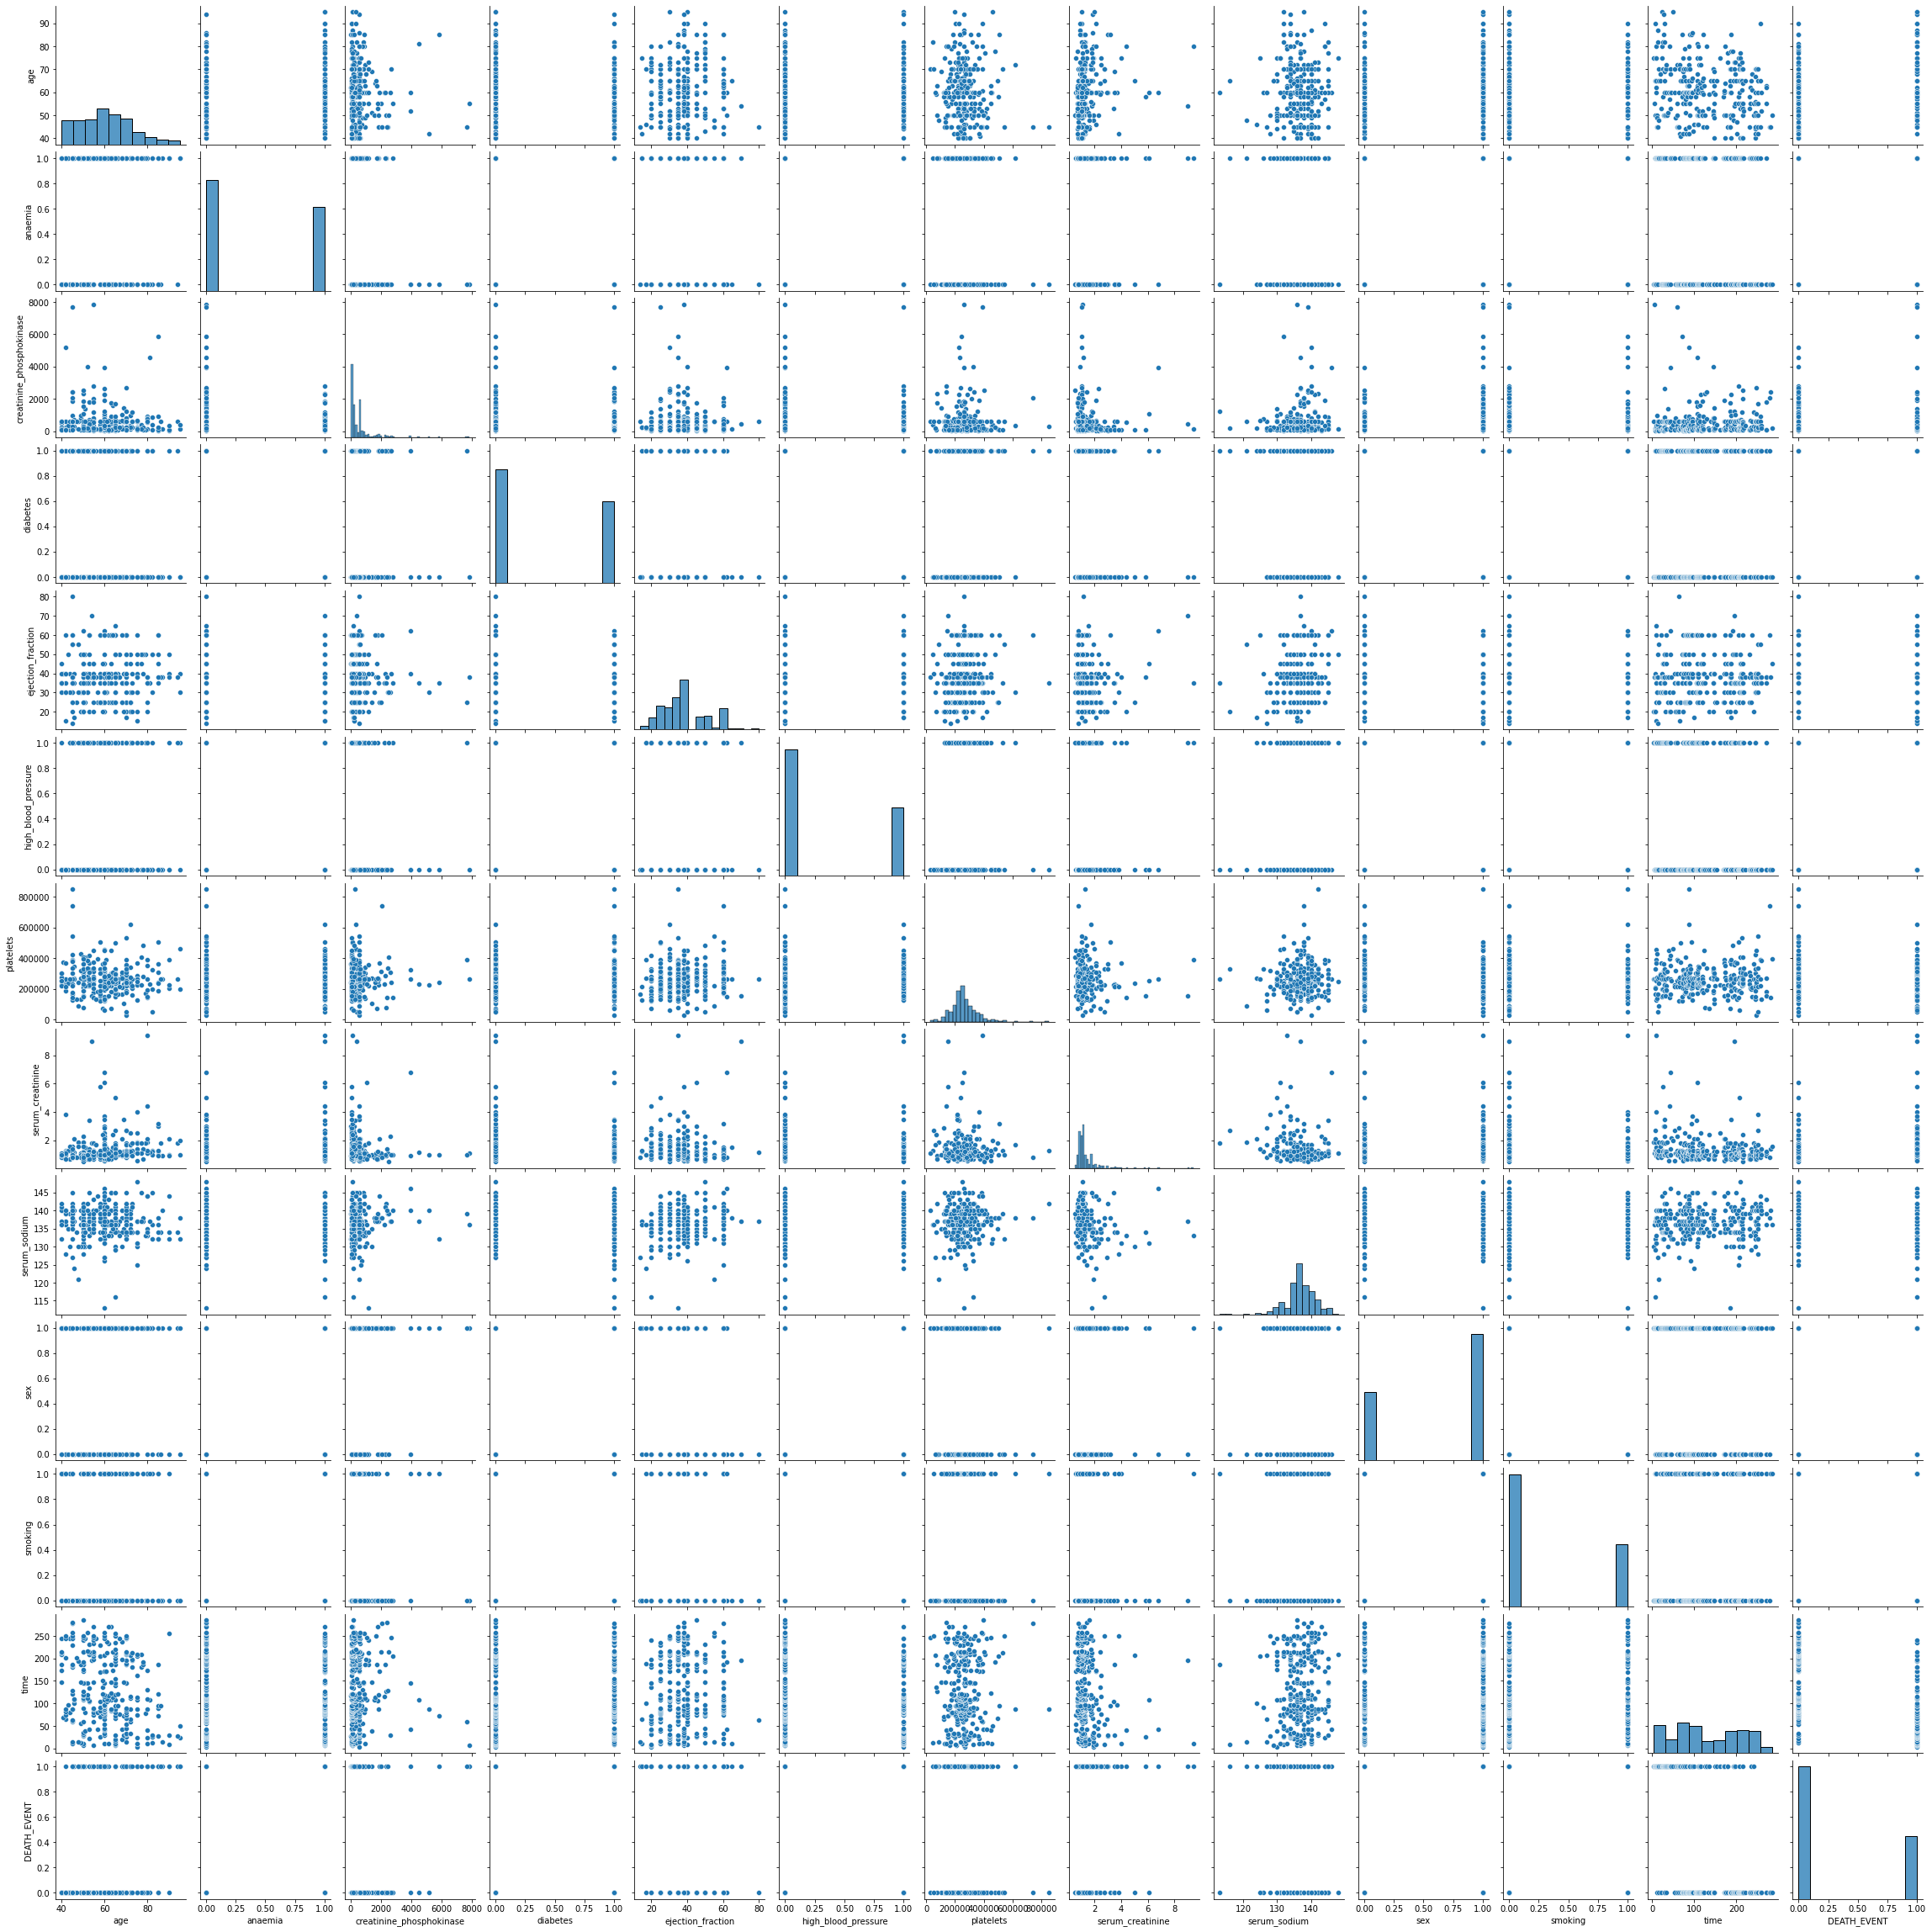

In [16]:
plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.savefig('AllPair.png')

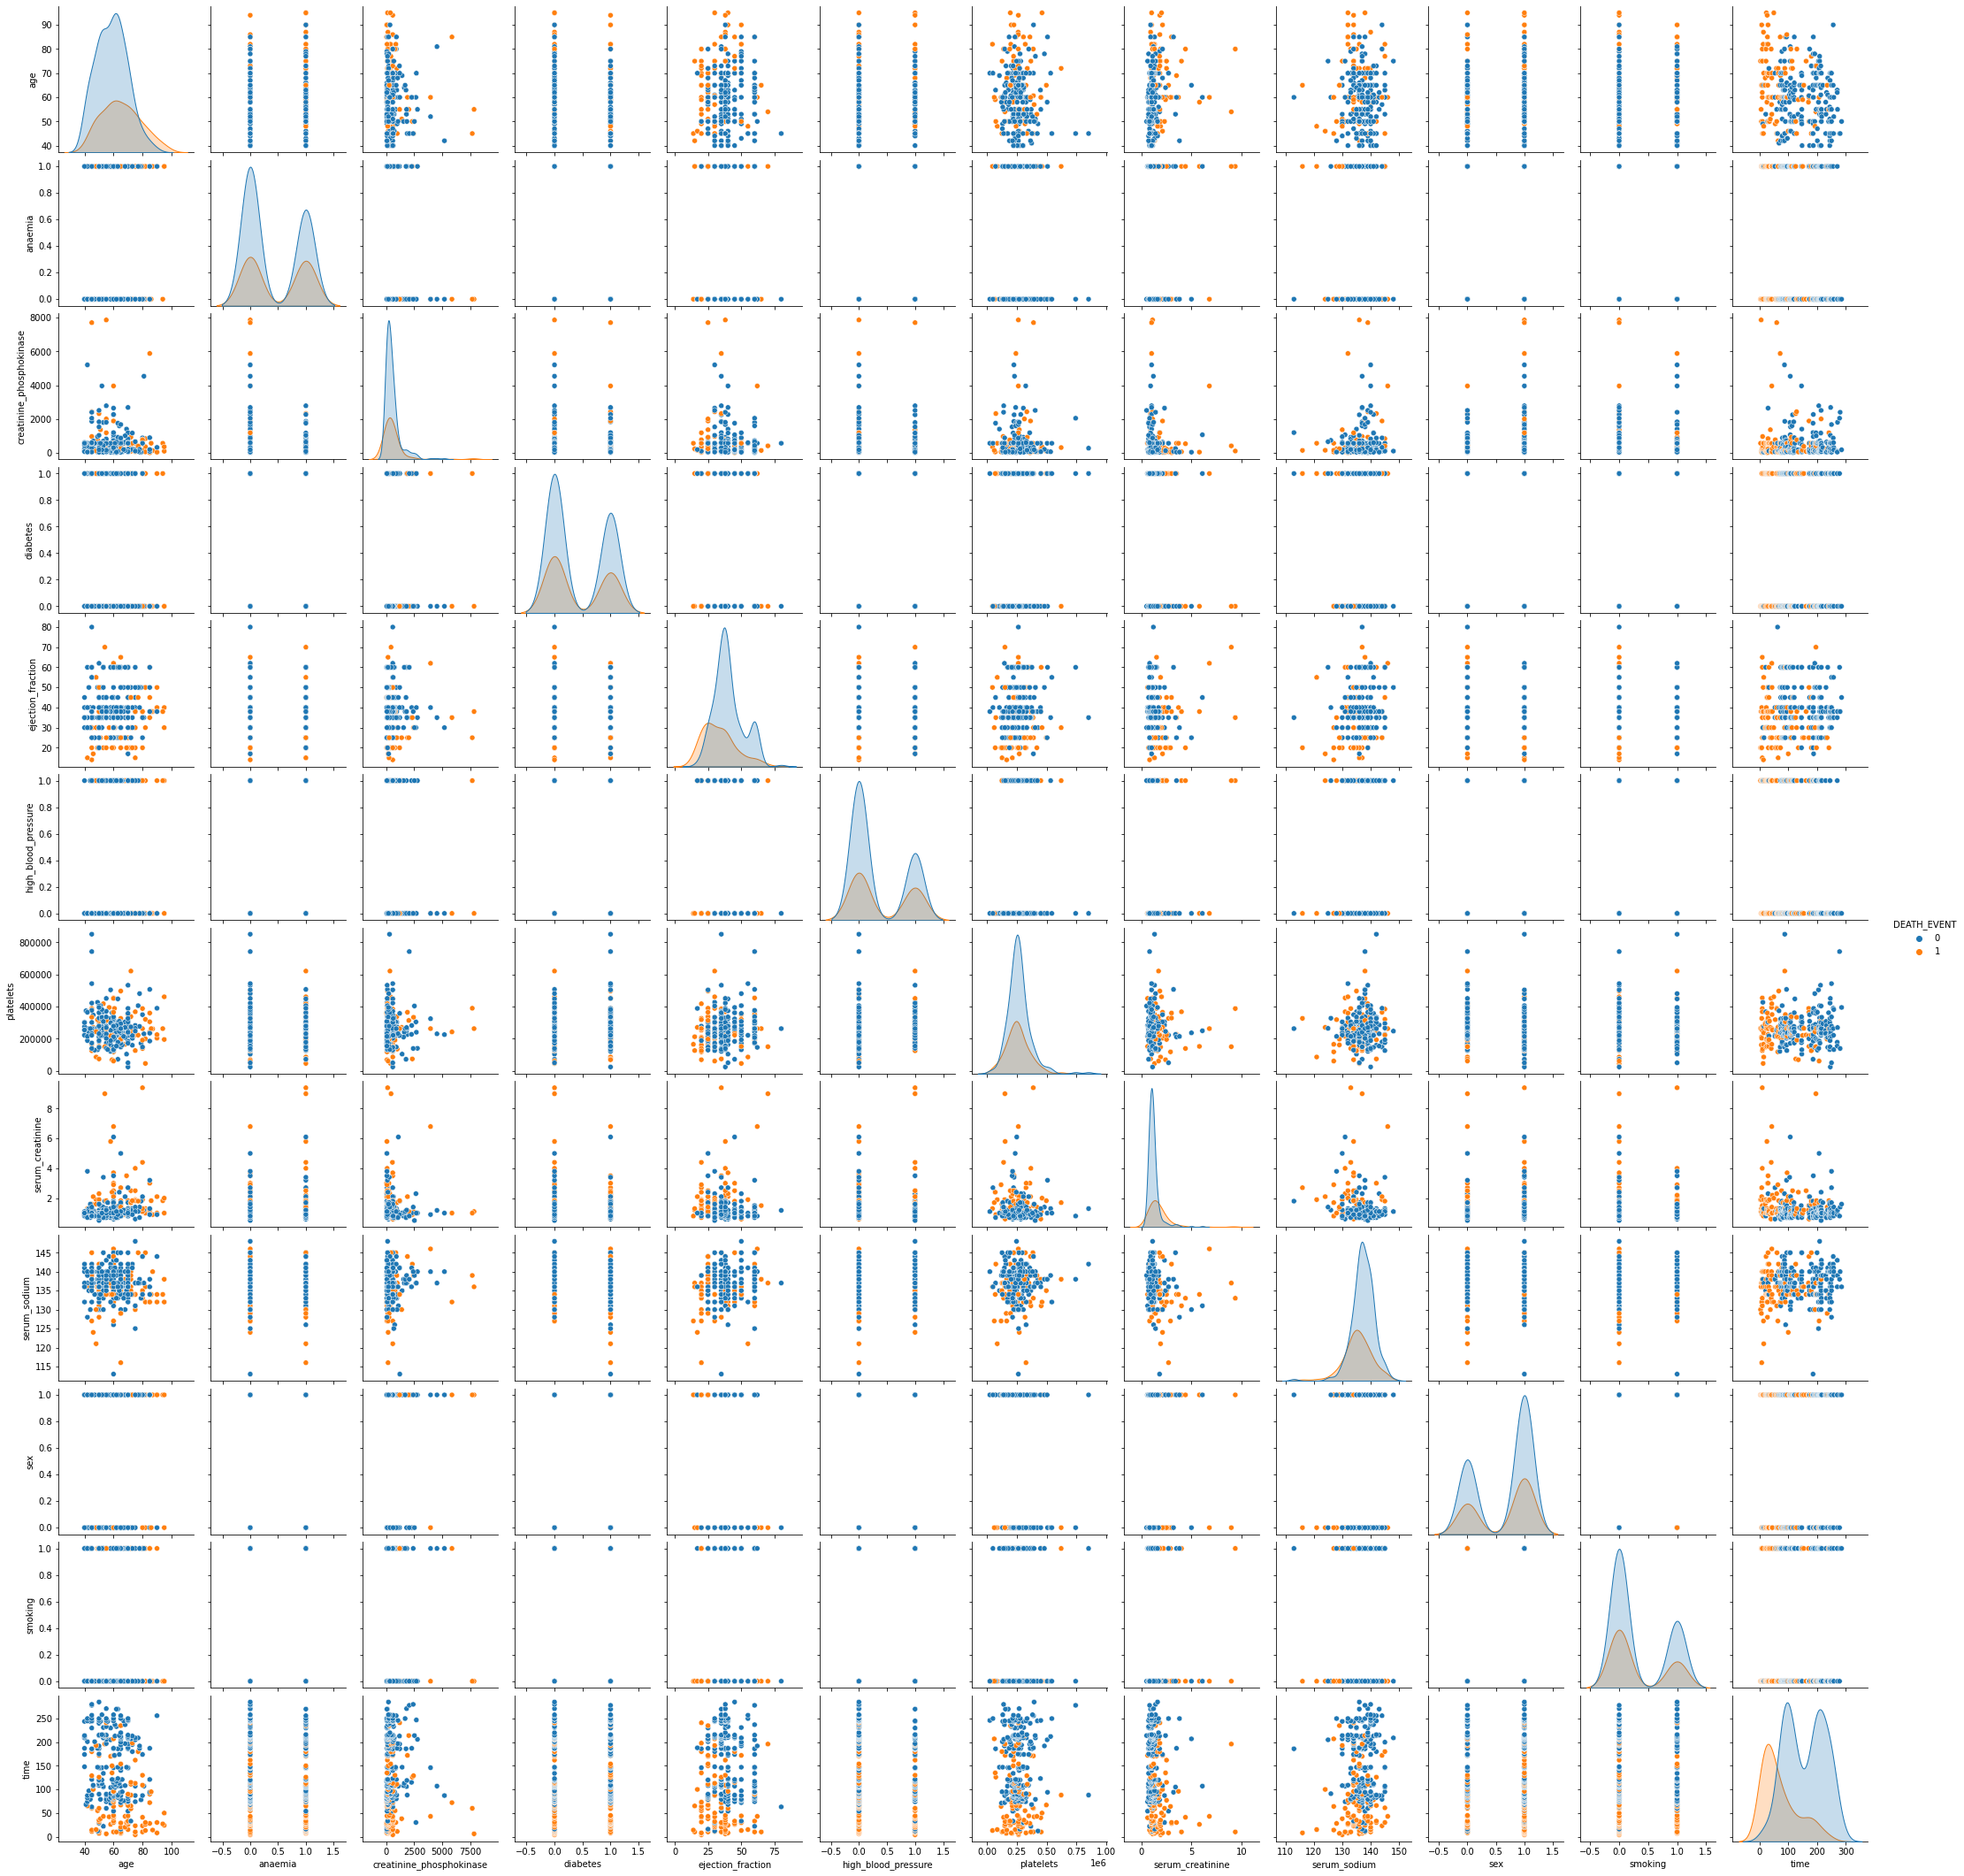

In [17]:
sns.pairplot(df, hue='DEATH_EVENT')

### Separating Dependent & Independent values

In [18]:
x = df.drop('DEATH_EVENT', axis=1)
y=df.DEATH_EVENT

In [20]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.25)
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
155,60.0,1,231,1,25,0,194000.0,1.7,140,1,0,120
237,70.0,0,232,0,30,0,173000.0,1.2,132,1,0,210
258,45.0,1,66,1,25,0,233000.0,0.8,135,1,0,230
112,50.0,0,369,1,25,0,252000.0,1.6,136,1,0,90
277,70.0,0,582,1,38,0,25100.0,1.1,140,1,0,246


In [24]:
xtest.shape

(75, 12)

## Fit the Model using Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [28]:
pred = clf.predict(xtest)
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

## Confusion Matrix

In [29]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve,plot_roc_curve

In [30]:
cm = confusion_matrix(ytest,pred)
cm

array([[40, 11],
       [13, 11]], dtype=int64)

In [31]:
acc = (40+20) / (40+20+6+9)
acc*100

80.0

In [32]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77        51
           1       0.50      0.46      0.48        24

    accuracy                           0.68        75
   macro avg       0.63      0.62      0.62        75
weighted avg       0.67      0.68      0.68        75



Text(33.0, 0.5, 'Actual Values')

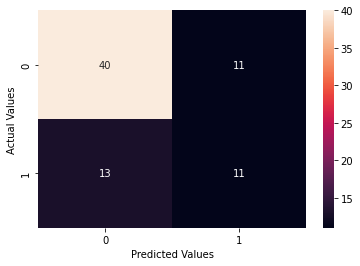

In [33]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

## ROC

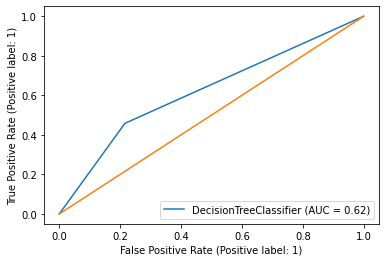

In [34]:
plot_roc_curve(clf,xtest,ytest)
plt.plot([0,1],[0,1])